In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "./images/covid19ctscandlmulti/images/"
mask_dir = "./images/covid19ctscandlmulti/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-004
in_channels    = 3
out_channels   = 4
batch_size     = 1
loss_type      = 'CE'
model_type     = 'unet_rd'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNetRd(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=1024, bias=False)
        (pointwise): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (first_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (first_actv): PReLU(num_parameters=512)
      (second_conv): DepthwiseSeperableConv(
        (depthwise): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=512, bias=False)
        (pointwise): Conv2d(512, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
      (second_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.00it/s, loss=0.993]


Ave Loss: 1.2039992553847176
Ave Accuracy: 0.8580525716145834
Ave F1: 0.3651154172402456
Ave Precision: 0.3754904918006494
Ave Recall: 0.6951692738220477
Ave Specificity: 0.6951692738220477
Saving model to test.pth...
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.02it/s, loss=0.798]


Ave Loss: 0.9416347759110587
Ave Accuracy: 0.8976765950520833
Ave F1: 0.3617326106325375
Ave Precision: 0.4026734275250006
Ave Recall: 0.6709751894856468
Ave Specificity: 0.6709751894856468
Saving model to test.pth...
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.24it/s, loss=0.651]


Ave Loss: 0.7728836800370897
Ave Accuracy: 0.921453857421875
Ave F1: 0.36473126237935805
Ave Precision: 0.43148088744326935
Ave Recall: 0.6300921520589323
Ave Specificity: 0.6348544671069699
Saving model to test.pth...
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.31it/s, loss=0.534]


Ave Loss: 0.6359453414167676
Ave Accuracy: 0.9287150065104167
Ave F1: 0.409869431780825
Ave Precision: 0.4981290867411295
Ave Recall: 0.5960119851198175
Ave Specificity: 0.6257196499928933
Saving model to test.pth...
Epoch: 4


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.61it/s, loss=0.46]


Ave Loss: 0.5289012355463846
Ave Accuracy: 0.9308553059895833
Ave F1: 0.44246781054067047
Ave Precision: 0.5371278488063205
Ave Recall: 0.5810908774134191
Ave Specificity: 0.6262291022257623
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.02it/s, loss=0.401]


Ave Loss: 0.4468596343483244
Ave Accuracy: 0.9281636555989583
Ave F1: 0.41683899527168383
Ave Precision: 0.4977312729366527
Ave Recall: 0.5680130989310641
Ave Specificity: 0.6083287109286305
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.71it/s, loss=0.365]


Ave Loss: 0.3893369106309755
Ave Accuracy: 0.93062744140625
Ave F1: 0.4170895456860404
Ave Precision: 0.5547882367859737
Ave Recall: 0.5526355583826675
Ave Specificity: 0.5987701174603389
Saving model to test.pth...
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.99it/s, loss=0.32]


Ave Loss: 0.34456151489700587
Ave Accuracy: 0.9303080240885416
Ave F1: 0.4462504705322205
Ave Precision: 0.5776908196826042
Ave Recall: 0.545091227346855
Ave Specificity: 0.607044587511036
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.98it/s, loss=0.285]


Ave Loss: 0.313204368523189
Ave Accuracy: 0.9330159505208333
Ave F1: 0.4606494130360583
Ave Precision: 0.5939243640971713
Ave Recall: 0.5598295849750621
Ave Specificity: 0.6171712925854956
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.16it/s, loss=0.259]


Ave Loss: 0.2814913645386696
Ave Accuracy: 0.9358927408854166
Ave F1: 0.49310892373885357
Ave Precision: 0.62995948654415
Ave Recall: 0.5687170133161837
Ave Specificity: 0.6305874242094828
Saving model to test.pth...
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.00it/s, loss=0.241]


Ave Loss: 0.2488422040428434
Ave Accuracy: 0.9371480305989583
Ave F1: 0.5046658286523061
Ave Precision: 0.6180331205307256
Ave Recall: 0.6108932462544026
Ave Specificity: 0.6639542884538108
Saving model to test.pth...
Epoch: 11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.63it/s, loss=0.23]


Ave Loss: 0.22203283331223897
Ave Accuracy: 0.9366353352864584
Ave F1: 0.5183577786795444
Ave Precision: 0.6305781987637854
Ave Recall: 0.6164976082535197
Ave Specificity: 0.6733561903877633
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.54it/s, loss=0.207]


Ave Loss: 0.19972934286509242
Ave Accuracy: 0.9365702311197917
Ave F1: 0.5369297361535741
Ave Precision: 0.6306130064593258
Ave Recall: 0.6398515911777044
Ave Specificity: 0.6953881350768439
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.85it/s, loss=0.206]


Ave Loss: 0.1841450680579458
Ave Accuracy: 0.9362528483072917
Ave F1: 0.5209182298737053
Ave Precision: 0.6160153729759162
Ave Recall: 0.6389603256911998
Ave Specificity: 0.6877860567409577
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.69it/s, loss=0.183]


Ave Loss: 0.16549913361668586
Ave Accuracy: 0.9354105631510417
Ave F1: 0.5354695976879441
Ave Precision: 0.6218837570344716
Ave Recall: 0.6555458297595197
Ave Specificity: 0.7051223669101783
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.80it/s, loss=0.178]


Ave Loss: 0.16316956100719315
Ave Accuracy: 0.9362955729166667
Ave F1: 0.5242712382173612
Ave Precision: 0.6283836987470875
Ave Recall: 0.631472413133175
Ave Specificity: 0.6861401977306217
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.74it/s, loss=0.174]


Ave Loss: 0.1537282577582768
Ave Accuracy: 0.9366251627604166
Ave F1: 0.5239174543947548
Ave Precision: 0.6501536736277195
Ave Recall: 0.5982566831684392
Ave Specificity: 0.6604297636509846
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.80it/s, loss=0.165]


Ave Loss: 0.1561780357999461
Ave Accuracy: 0.9340291341145833
Ave F1: 0.46767046120490946
Ave Precision: 0.5978885964133009
Ave Recall: 0.6012283492580498
Ave Specificity: 0.6439623581824455
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.79it/s, loss=0.156]


Ave Loss: 0.1406851623739515
Ave Accuracy: 0.9265665690104167
Ave F1: 0.4959344565158333
Ave Precision: 0.5872592775090872
Ave Recall: 0.6564814028905299
Ave Specificity: 0.6906799172470525
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.80it/s, loss=0.173]


Ave Loss: 0.15212920776435307
Ave Accuracy: 0.9226094563802083
Ave F1: 0.5226424580607226
Ave Precision: 0.5816055215671602
Ave Recall: 0.6976945657596231
Ave Specificity: 0.7321192051996932
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.68it/s, loss=0.158]


Ave Loss: 0.12627409749797414
Ave Accuracy: 0.9227925618489583
Ave F1: 0.504487931744251
Ave Precision: 0.564365637943359
Ave Recall: 0.7036363230365502
Ave Specificity: 0.7368270526268101
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.73it/s, loss=0.141]


Ave Loss: 0.11657880736248834
Ave Accuracy: 0.9189900716145833
Ave F1: 0.4980855468429528
Ave Precision: 0.5530509415817151
Ave Recall: 0.7155279837483803
Ave Specificity: 0.7421179368466145
Saving model to test.pth...
Epoch: 22


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.80it/s, loss=0.15]


Ave Loss: 0.11225939132273197
Ave Accuracy: 0.9287882486979167
Ave F1: 0.5339837197347688
Ave Precision: 0.611063106113514
Ave Recall: 0.6667248214264336
Ave Specificity: 0.7156588470879901
Saving model to test.pth...
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.72it/s, loss=0.148]


Ave Loss: 0.10994339340499469
Ave Accuracy: 0.9343607584635417
Ave F1: 0.5145136636616713
Ave Precision: 0.6256146663340911
Ave Recall: 0.628226377411914
Ave Specificity: 0.6855241133309042
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.78it/s, loss=0.131]


Ave Loss: 0.10499797346336501
Ave Accuracy: 0.9359537760416666
Ave F1: 0.5204557086733556
Ave Precision: 0.6248627278026041
Ave Recall: 0.6308286396522104
Ave Specificity: 0.6875561620101031
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.77it/s, loss=0.119]


Ave Loss: 0.09578446820378303
Ave Accuracy: 0.9349344889322917
Ave F1: 0.519713058768734
Ave Precision: 0.6034151841713143
Ave Recall: 0.6784513630817351
Ave Specificity: 0.7184175345443234
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.76it/s, loss=0.133]


Ave Loss: 0.0899685806461743
Ave Accuracy: 0.9297322591145833
Ave F1: 0.48071217404944344
Ave Precision: 0.5067195262931226
Ave Recall: 0.7366574852246349
Ave Specificity: 0.7465332541504403
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.99it/s, loss=0.137]


Ave Loss: 0.0810320506138461
Ave Accuracy: 0.9378438313802083
Ave F1: 0.4927539427347038
Ave Precision: 0.583080289432017
Ave Recall: 0.6604615714007235
Ave Specificity: 0.6872057566486351
Saving model to test.pth...
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.07it/s, loss=0.127]


Ave Loss: 0.07756762350244181
Ave Accuracy: 0.9396260579427084
Ave F1: 0.4762716311941327
Ave Precision: 0.5892005801207879
Ave Recall: 0.632118104202757
Ave Specificity: 0.6609874765586092
Saving model to test.pth...
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.24it/s, loss=0.102]


Ave Loss: 0.07467302400618792
Ave Accuracy: 0.9376017252604166
Ave F1: 0.5042929115389394
Ave Precision: 0.5958112950183213
Ave Recall: 0.651148403201
Ave Specificity: 0.6886452555346945
Saving model to test.pth...
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.77it/s, loss=0.0927]


Ave Loss: 0.07085887196340732
Ave Accuracy: 0.9338582356770834
Ave F1: 0.49564763177694465
Ave Precision: 0.5501534019225932
Ave Recall: 0.6946544731166473
Ave Specificity: 0.7209677516987323
Saving model to test.pth...
Epoch: 31


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.66it/s, loss=0.0989]


Ave Loss: 0.06613389812409878
Ave Accuracy: 0.9321044921875
Ave F1: 0.47709055624984764
Ave Precision: 0.5328081078031913
Ave Recall: 0.6949506259589023
Ave Specificity: 0.7104687150891421
Saving model to test.pth...
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.77it/s, loss=0.0925]


Ave Loss: 0.058705244665699347
Ave Accuracy: 0.9343465169270834
Ave F1: 0.4624641106437888
Ave Precision: 0.5397230665572601
Ave Recall: 0.6716124459736686
Ave Specificity: 0.6859456710117743
Saving model to test.pth...
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.41it/s, loss=0.0916]


Ave Loss: 0.056151937480483735
Ave Accuracy: 0.9345845540364583
Ave F1: 0.4606645464808168
Ave Precision: 0.5558066919492618
Ave Recall: 0.6597755941337609
Ave Specificity: 0.6749080168698873
Saving model to test.pth...
Epoch: 34


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.90it/s, loss=0.0829]


Ave Loss: 0.05272817047578948
Ave Accuracy: 0.933056640625
Ave F1: 0.48198558892996435
Ave Precision: 0.5722045512744864
Ave Recall: 0.6659995730927661
Ave Specificity: 0.6892606521936561
Saving model to test.pth...
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.19it/s, loss=0.0757]


Ave Loss: 0.0520870122260281
Ave Accuracy: 0.9282511393229167
Ave F1: 0.4907200565266331
Ave Precision: 0.5353666385516163
Ave Recall: 0.711141179850861
Ave Specificity: 0.7309884447255508
Saving model to test.pth...
Epoch: 36


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.94it/s, loss=0.0776]


Ave Loss: 0.05169384059097085
Ave Accuracy: 0.9282267252604167
Ave F1: 0.46096956280947526
Ave Precision: 0.5034430302309228
Ave Recall: 0.7032569978952797
Ave Specificity: 0.7126853396351135
Saving model to test.pth...
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.90it/s, loss=0.0978]


Ave Loss: 0.051165183766611985
Ave Accuracy: 0.9325826009114583
Ave F1: 0.43458519923225086
Ave Precision: 0.552615770073855
Ave Recall: 0.6238325460000858
Ave Specificity: 0.6476331303423468
Saving model to test.pth...
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.74it/s, loss=0.0804]


Ave Loss: 0.04978295689714807
Ave Accuracy: 0.931182861328125
Ave F1: 0.4679023513507957
Ave Precision: 0.5541026287259684
Ave Recall: 0.6461679961892324
Ave Specificity: 0.6760567570890843
Saving model to test.pth...
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.88it/s, loss=0.0685]


Ave Loss: 0.04728118609637022
Ave Accuracy: 0.91990966796875
Ave F1: 0.4501376381262432
Ave Precision: 0.46960928996102996
Ave Recall: 0.7218722687404582
Ave Specificity: 0.7291570908987672
Saving model to test.pth...
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.99it/s, loss=0.0924]


Ave Loss: 0.04593331747289215
Ave Accuracy: 0.9302001953125
Ave F1: 0.4381864677345097
Ave Precision: 0.5266959680391203
Ave Recall: 0.65813433848683
Ave Specificity: 0.6667527918912117
Saving model to test.pth...
Epoch: 41


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.66it/s, loss=0.066]


Ave Loss: 0.04318267410354955
Ave Accuracy: 0.9330525716145833
Ave F1: 0.4525259276524957
Ave Precision: 0.5633335814250776
Ave Recall: 0.62142329528322
Ave Specificity: 0.646221775400065
Saving model to test.pth...
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.78it/s, loss=0.0719]


Ave Loss: 0.04082356582262686
Ave Accuracy: 0.9271199544270833
Ave F1: 0.4657009087846597
Ave Precision: 0.5341951336400158
Ave Recall: 0.6844806133747671
Ave Specificity: 0.6995965433104662
Saving model to test.pth...
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.97it/s, loss=0.0716]


Ave Loss: 0.038852178079209154
Ave Accuracy: 0.9331095377604167
Ave F1: 0.4846891422724443
Ave Precision: 0.5522824109862491
Ave Recall: 0.663191549343863
Ave Specificity: 0.6897431917160427
Saving model to test.pth...
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.73it/s, loss=0.0563]


Ave Loss: 0.03815363191866449
Ave Accuracy: 0.9351033528645833
Ave F1: 0.44348208803615846
Ave Precision: 0.5375467354038065
Ave Recall: 0.6469425311764742
Ave Specificity: 0.6579743891783828
Saving model to test.pth...
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.52it/s, loss=0.0611]


Ave Loss: 0.03587297672139747
Ave Accuracy: 0.9331156412760416
Ave F1: 0.46136792959919926
Ave Precision: 0.5826642081336183
Ave Recall: 0.6025326494132204
Ave Specificity: 0.6458066407441172
Saving model to test.pth...
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.37it/s, loss=0.0511]


Ave Loss: 0.034510610877935374
Ave Accuracy: 0.9294637044270834
Ave F1: 0.47301362575432176
Ave Precision: 0.5204204267981931
Ave Recall: 0.7098074526635515
Ave Specificity: 0.7216732538344973
Saving model to test.pth...
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.46it/s, loss=0.0492]


Ave Loss: 0.03401606182700821
Ave Accuracy: 0.9324076334635417
Ave F1: 0.44707619895531875
Ave Precision: 0.5129118778249021
Ave Recall: 0.6692849376384177
Ave Specificity: 0.6766591510158622
Saving model to test.pth...
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.50it/s, loss=0.0499]


Ave Loss: 0.03322406534903816
Ave Accuracy: 0.9341695149739583
Ave F1: 0.48052588466466484
Ave Precision: 0.5574801415719374
Ave Recall: 0.657037081950574
Ave Specificity: 0.6795271257389596
Saving model to test.pth...
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.69it/s, loss=0.0679]


Ave Loss: 0.030336985258119446
Ave Accuracy: 0.9238199869791667
Ave F1: 0.4698087486218518
Ave Precision: 0.5088075544877239
Ave Recall: 0.7236973554509362
Ave Specificity: 0.7342099310413518
Saving model to test.pth...
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.09it/s, loss=0.0522]


Ave Loss: 0.03091769747968231
Ave Accuracy: 0.929620361328125
Ave F1: 0.45553277982574064
Ave Precision: 0.5098379284404245
Ave Recall: 0.703115541937639
Ave Specificity: 0.7072145855965851
Saving model to test.pth...
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.44it/s, loss=0.0535]


Ave Loss: 0.032028440998068876
Ave Accuracy: 0.936053466796875
Ave F1: 0.5130023335471185
Ave Precision: 0.5919225351270643
Ave Recall: 0.6605113530776385
Ave Specificity: 0.6965071620127377
Saving model to test.pth...
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.69it/s, loss=0.0435]


Ave Loss: 0.028290058579295875
Ave Accuracy: 0.9303120930989583
Ave F1: 0.48502597383451035
Ave Precision: 0.5093286785717833
Ave Recall: 0.7234445202724247
Ave Specificity: 0.7367967030065705
Saving model to test.pth...
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.97it/s, loss=0.0686]


Ave Loss: 0.028187537419476678
Ave Accuracy: 0.9303059895833333
Ave F1: 0.42974196586702385
Ave Precision: 0.49390445304678665
Ave Recall: 0.6727190486440968
Ave Specificity: 0.6770646000586013
Saving model to test.pth...
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.94it/s, loss=0.0565]


Ave Loss: 0.032023950227137124
Ave Accuracy: 0.9337056477864584
Ave F1: 0.4442938788057145
Ave Precision: 0.5442564477678274
Ave Recall: 0.6423640902981311
Ave Specificity: 0.6559422280652975
Saving model to test.pth...
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.03it/s, loss=0.0428]


Ave Loss: 0.030402814357408454
Ave Accuracy: 0.9352925618489584
Ave F1: 0.44275243411147114
Ave Precision: 0.5432514625615998
Ave Recall: 0.6235306718073214
Ave Specificity: 0.6433595665966786
Saving model to test.pth...
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.39it/s, loss=0.0417]


Ave Loss: 0.03247377694185291
Ave Accuracy: 0.9352498372395833
Ave F1: 0.46673683551382156
Ave Precision: 0.5458168602062469
Ave Recall: 0.6331545141699636
Ave Specificity: 0.6578363934468587
Saving model to test.pth...
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.15it/s, loss=0.0574]


Ave Loss: 0.03417583008828972
Ave Accuracy: 0.9327412923177083
Ave F1: 0.4653289374024598
Ave Precision: 0.5679713605007776
Ave Recall: 0.6144654143320935
Ave Specificity: 0.6532358915482912
Saving model to test.pth...
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.81it/s, loss=0.0628]


Ave Loss: 0.03320976642758718
Ave Accuracy: 0.9263468424479167
Ave F1: 0.43455748489441376
Ave Precision: 0.5462919131816648
Ave Recall: 0.6214832589424553
Ave Specificity: 0.649948092786182
Saving model to test.pth...
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.96it/s, loss=0.0692]


Ave Loss: 0.031719235290906256
Ave Accuracy: 0.9278299967447917
Ave F1: 0.48975538874766694
Ave Precision: 0.6339030596317221
Ave Recall: 0.5940519226374601
Ave Specificity: 0.652939660445942
Saving model to test.pth...
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.01it/s, loss=0.0525]


Ave Loss: 0.027380950349782194
Ave Accuracy: 0.9266276041666667
Ave F1: 0.5135235435163908
Ave Precision: 0.5983117817666662
Ave Recall: 0.6667913011419506
Ave Specificity: 0.7062833687862502
Saving model to test.pth...
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.32it/s, loss=0.0407]


Ave Loss: 0.02472037390938827
Ave Accuracy: 0.9275126139322917
Ave F1: 0.4754045409956434
Ave Precision: 0.5275666217011632
Ave Recall: 0.70222266882745
Ave Specificity: 0.7207948034974242
Saving model to test.pth...
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.22it/s, loss=0.0327]


Ave Loss: 0.022136860161221454
Ave Accuracy: 0.930242919921875
Ave F1: 0.45858092262394146
Ave Precision: 0.5223714553917723
Ave Recall: 0.6661337483747745
Ave Specificity: 0.6839154231316736
Saving model to test.pth...
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.74it/s, loss=0.0311]


Ave Loss: 0.021219041278319698
Ave Accuracy: 0.924951171875
Ave F1: 0.4712332151173594
Ave Precision: 0.5386656042873501
Ave Recall: 0.6742269828432991
Ave Specificity: 0.7008639320353569
Saving model to test.pth...
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.96it/s, loss=0.0548]


Ave Loss: 0.021169596211984755
Ave Accuracy: 0.93189697265625
Ave F1: 0.4233300696373193
Ave Precision: 0.5277452891804646
Ave Recall: 0.6171285736672477
Ave Specificity: 0.6328804143420383
Saving model to test.pth...
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.90it/s, loss=0.0367]


Ave Loss: 0.020270213318456496
Ave Accuracy: 0.9355244954427083
Ave F1: 0.4441215561530855
Ave Precision: 0.5784840750295668
Ave Recall: 0.588988510476724
Ave Specificity: 0.6233374920908425
Saving model to test.pth...
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.92it/s, loss=0.0342]


Ave Loss: 0.02340581249445677
Ave Accuracy: 0.9341573079427083
Ave F1: 0.4739236137206796
Ave Precision: 0.6119042180963188
Ave Recall: 0.5994174224541365
Ave Specificity: 0.6436703308685858
Saving model to test.pth...
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.81it/s, loss=0.0353]


Ave Loss: 0.024369634594768284
Ave Accuracy: 0.9304361979166667
Ave F1: 0.47441493291134257
Ave Precision: 0.578557979689428
Ave Recall: 0.6300109225732481
Ave Specificity: 0.6649665129968434
Saving model to test.pth...
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.99it/s, loss=0.0343]


Ave Loss: 0.023966406764728682
Ave Accuracy: 0.92874755859375
Ave F1: 0.46402322625785425
Ave Precision: 0.5209902997190501
Ave Recall: 0.6918294507594079
Ave Specificity: 0.7014441529576263
Saving model to test.pth...
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.51it/s, loss=0.0363]


Ave Loss: 0.02214790698406952
Ave Accuracy: 0.9232421875
Ave F1: 0.48395030046743914
Ave Precision: 0.5189334094711552
Ave Recall: 0.7120729371939292
Ave Specificity: 0.7335328974592283
Saving model to test.pth...
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.10it/s, loss=0.0322]


Ave Loss: 0.02108458277902433
Ave Accuracy: 0.930792236328125
Ave F1: 0.4560038001120048
Ave Precision: 0.5278604473395462
Ave Recall: 0.6646212255496703
Ave Specificity: 0.6801378536539097
Saving model to test.pth...
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.89it/s, loss=0.0304]


Ave Loss: 0.020423823249127185
Ave Accuracy: 0.9345621744791667
Ave F1: 0.49754480877216445
Ave Precision: 0.6171434058105354
Ave Recall: 0.6249916103702747
Ave Specificity: 0.6648168278690438
Saving model to test.pth...
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.80it/s, loss=0.0267]


Ave Loss: 0.019538462594417588
Ave Accuracy: 0.93687744140625
Ave F1: 0.4776923250099899
Ave Precision: 0.5645069065798441
Ave Recall: 0.6262711245430361
Ave Specificity: 0.6554535625879659
Saving model to test.pth...
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.24it/s, loss=0.0293]


Ave Loss: 0.01808061958955867
Ave Accuracy: 0.9360066731770833
Ave F1: 0.43992074540200665
Ave Precision: 0.526030289570422
Ave Recall: 0.6309668286052795
Ave Specificity: 0.64067136232423
Saving model to test.pth...
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.78it/s, loss=0.0352]


Ave Loss: 0.016774022898503712
Ave Accuracy: 0.9308634440104167
Ave F1: 0.48680698229118463
Ave Precision: 0.5734490482475901
Ave Recall: 0.6559441705603494
Ave Specificity: 0.6880823144843622
Saving model to test.pth...
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.69it/s, loss=0.0272]


Ave Loss: 0.01629890209463026
Ave Accuracy: 0.9268351236979167
Ave F1: 0.4973634749617002
Ave Precision: 0.5685392449890632
Ave Recall: 0.673371979854617
Ave Specificity: 0.7066847570107406
Saving model to test.pth...
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.73it/s, loss=0.0246]


Ave Loss: 0.01725483410326498
Ave Accuracy: 0.9307230631510417
Ave F1: 0.4741006540456874
Ave Precision: 0.5496522974423804
Ave Recall: 0.678030643062971
Ave Specificity: 0.7000430170278382
Saving model to test.pth...
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.89it/s, loss=0.0339]


Ave Loss: 0.017604181240312756
Ave Accuracy: 0.9342508951822917
Ave F1: 0.4488740569453302
Ave Precision: 0.5435171161948513
Ave Recall: 0.6139443955978486
Ave Specificity: 0.6384709805726614
Saving model to test.pth...
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.76it/s, loss=0.0278]


Ave Loss: 0.016628029137583714
Ave Accuracy: 0.9352437337239583
Ave F1: 0.4815612937212296
Ave Precision: 0.6374386809706593
Ave Recall: 0.5802593907779156
Ave Specificity: 0.6331687988097784
Saving model to test.pth...
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.79it/s, loss=0.0362]


Ave Loss: 0.017628294159658255
Ave Accuracy: 0.931036376953125
Ave F1: 0.4847891554589092
Ave Precision: 0.5825043734125039
Ave Recall: 0.6452724709320756
Ave Specificity: 0.6790489470407007
Saving model to test.pth...
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.86it/s, loss=0.0256]


Ave Loss: 0.016656206075900366
Ave Accuracy: 0.9253011067708333
Ave F1: 0.4437149698623175
Ave Precision: 0.4996418714712091
Ave Recall: 0.6817420085428992
Ave Specificity: 0.6921966733095606
Saving model to test.pth...
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.62it/s, loss=0.0264]


Ave Loss: 0.01592475290942405
Ave Accuracy: 0.9287699381510417
Ave F1: 0.4845932579790865
Ave Precision: 0.5658950180072293
Ave Recall: 0.6599625525232736
Ave Specificity: 0.6922559364939755
Saving model to test.pth...
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.77it/s, loss=0.0212]


Ave Loss: 0.014393738893392896
Ave Accuracy: 0.9338236490885417
Ave F1: 0.46306573970183923
Ave Precision: 0.5490808203511375
Ave Recall: 0.65847827433139
Ave Specificity: 0.6764084374925191
Saving model to test.pth...
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.14it/s, loss=0.0234]


Ave Loss: 0.013925714720971882
Ave Accuracy: 0.9334615071614584
Ave F1: 0.44404274384147013
Ave Precision: 0.5134308690621256
Ave Recall: 0.6513110120070563
Ave Specificity: 0.6629118920730052
Saving model to test.pth...
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.23it/s, loss=0.0226]


Ave Loss: 0.013646904924618347
Ave Accuracy: 0.9314310709635417
Ave F1: 0.44642915324573756
Ave Precision: 0.5389838125029021
Ave Recall: 0.6391340005343845
Ave Specificity: 0.6610652480387835
Saving model to test.pth...
Epoch: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.61it/s, loss=0.0268]


Ave Loss: 0.012337031245364675
Ave Accuracy: 0.929779052734375
Ave F1: 0.5081192024866794
Ave Precision: 0.5986303856847203
Ave Recall: 0.6512319878123843
Ave Specificity: 0.6919300080345407
Saving model to test.pth...
Epoch: 86


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.74it/s, loss=0.018]


Ave Loss: 0.011432826020089644
Ave Accuracy: 0.930859375
Ave F1: 0.4635653736380877
Ave Precision: 0.5017481111871718
Ave Recall: 0.6912965324509536
Ave Specificity: 0.7024495876947047
Saving model to test.pth...
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.24it/s, loss=0.0278]


Ave Loss: 0.01124087156661387
Ave Accuracy: 0.9335917154947917
Ave F1: 0.4392244534854252
Ave Precision: 0.5298942199578066
Ave Recall: 0.6432334654235918
Ave Specificity: 0.6587357409288901
Saving model to test.pth...
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 15.77it/s, loss=0.0192]


Ave Loss: 0.01130867315888671
Ave Accuracy: 0.9325480143229167
Ave F1: 0.440423115094926
Ave Precision: 0.5059206203299187
Ave Recall: 0.655364068545287
Ave Specificity: 0.6654399516328016
Saving model to test.pth...
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.00it/s, loss=0.0186]


Ave Loss: 0.011742012345764254
Ave Accuracy: 0.927484130859375
Ave F1: 0.4399741377838982
Ave Precision: 0.4876164077112414
Ave Recall: 0.6974765061160754
Ave Specificity: 0.6981484147823905
Saving model to test.pth...
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.30it/s, loss=0.0253]


Ave Loss: 0.011588231018478317
Ave Accuracy: 0.9224873860677083
Ave F1: 0.4895441705694606
Ave Precision: 0.5680026513000594
Ave Recall: 0.6781859956270523
Ave Specificity: 0.7073741500903744
Saving model to test.pth...
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.04it/s, loss=0.0248]


Ave Loss: 0.01272682777738997
Ave Accuracy: 0.9269307454427084
Ave F1: 0.46072943758592777
Ave Precision: 0.519766527285948
Ave Recall: 0.6790233390388039
Ave Specificity: 0.6927243163479156
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.94it/s, loss=0.0201]


Ave Loss: 0.013974376401997038
Ave Accuracy: 0.9283528645833333
Ave F1: 0.4665939562507878
Ave Precision: 0.5148996875842604
Ave Recall: 0.6803479614796153
Ave Specificity: 0.7014109970182614
Saving model to test.pth...
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.41it/s, loss=0.0313]


Ave Loss: 0.015582992356004459
Ave Accuracy: 0.9314208984375
Ave F1: 0.459008711282866
Ave Precision: 0.5358747621512724
Ave Recall: 0.6430153766652568
Ave Specificity: 0.6651370394773165
Saving model to test.pth...
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.66it/s, loss=0.0208]


Ave Loss: 0.015065275940911046
Ave Accuracy: 0.932977294921875
Ave F1: 0.4291798612443989
Ave Precision: 0.49345741556616146
Ave Recall: 0.6552860310073568
Ave Specificity: 0.6605379434424401
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.95it/s, loss=0.0227]


Ave Loss: 0.013831503070624812
Ave Accuracy: 0.9304219563802083
Ave F1: 0.4930808705161665
Ave Precision: 0.5855163000775048
Ave Recall: 0.6534534014912184
Ave Specificity: 0.6866531322547501
Saving model to test.pth...
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.00it/s, loss=0.0282]


Ave Loss: 0.012551312617558454
Ave Accuracy: 0.9221476236979167
Ave F1: 0.4846108036091398
Ave Precision: 0.5326962971169503
Ave Recall: 0.6877544958093252
Ave Specificity: 0.7131419465357387
Saving model to test.pth...
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 17.00it/s, loss=0.0227]


Ave Loss: 0.01275374423712492
Ave Accuracy: 0.9299967447916667
Ave F1: 0.481338685140663
Ave Precision: 0.5080542484920312
Ave Recall: 0.7046129010248738
Ave Specificity: 0.7197357604939526
Saving model to test.pth...
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.77it/s, loss=0.0183]


Ave Loss: 0.011776617781392166
Ave Accuracy: 0.9336201985677083
Ave F1: 0.4566156090792525
Ave Precision: 0.5025007281784267
Ave Recall: 0.6809283401836517
Ave Specificity: 0.6917535488014384
Saving model to test.pth...
Epoch: 99


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 16.93it/s, loss=0.0161]


Ave Loss: 0.010861817542796156
Ave Accuracy: 0.93306884765625
Ave F1: 0.47209394305918834
Ave Precision: 0.5645415310719256
Ave Recall: 0.6342109362271043
Ave Specificity: 0.6621891888645381
Saving model to test.pth...
Number of Parameters: 26382111


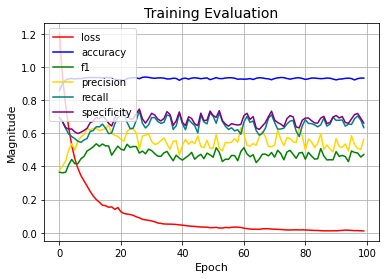

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

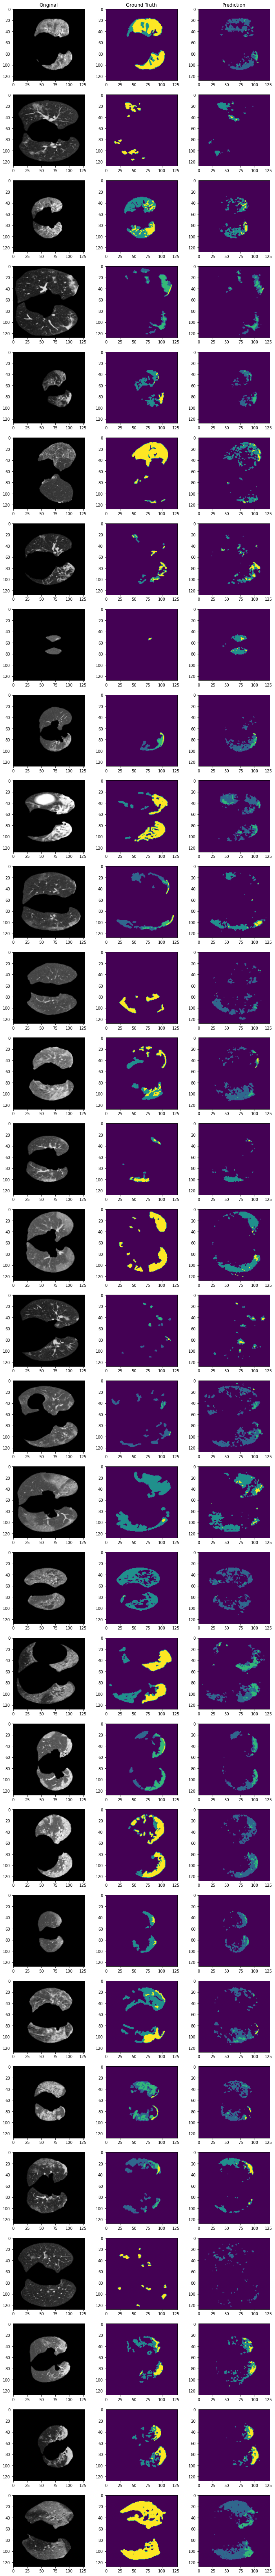

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
0,./tmp/test/images/i001.png,./tmp/test/masks/i001.tiff,0.258138,0.293743,0.862976,0.440545,0.558960,0.558960,0.916338,0.075620,...,0.041207,1.000000,0.993020,0.201613,0.041207,1.000000,0.683911,0.751789,0.055036,0.001101
1,./tmp/test/images/i005.png,./tmp/test/masks/i005.tiff,0.434612,0.494697,0.972290,0.498439,0.824448,0.868336,0.972040,0.331797,...,1.000000,1.000000,0.985760,0.487585,1.000000,NaN,0.495050,0.475248,0.004400,0.000000
2,./tmp/test/images/i010.png,./tmp/test/masks/i010.tiff,0.483796,0.595926,0.920654,0.802679,0.528381,0.646286,0.930760,0.296005,...,0.235294,1.000000,0.994988,0.354862,0.235294,NaN,0.695573,0.547786,0.138015,0.000000
3,./tmp/test/images/i011.png,./tmp/test/masks/i011.tiff,0.455577,0.573103,0.951843,0.738788,0.507749,0.507749,0.966544,0.168153,...,0.414855,0.321429,0.990566,0.304147,0.414855,0.321429,0.364040,0.440991,0.373659,0.021458
4,./tmp/test/images/i013.png,./tmp/test/masks/i013.tiff,0.441390,0.530673,0.967041,0.569013,0.757629,0.757629,0.970692,0.403055,...,0.567797,1.000000,0.993499,0.469220,0.567797,1.000000,0.458234,0.485680,0.207637,0.002387
5,./tmp/test/images/i016.png,./tmp/test/masks/i016.tiff,0.341771,0.386284,0.881714,0.623648,0.441746,0.581309,0.919534,0.046087,...,0.060174,1.000000,0.980118,0.284946,0.060174,NaN,0.773402,0.607274,0.086938,0.000000
6,./tmp/test/images/i019.png,./tmp/test/masks/i019.tiff,0.511092,0.619384,0.961731,0.626318,0.627078,0.720309,0.965165,0.215170,...,0.463636,1.000000,0.979113,0.438486,0.463636,NaN,0.382897,0.297384,0.285897,0.000000
7,./tmp/test/images/i023.png,./tmp/test/masks/i023.tiff,0.422190,0.484241,0.972534,0.431340,0.916801,0.937601,0.972625,0.016166,...,1.000000,1.000000,0.972625,0.777778,1.000000,NaN,0.000000,0.026316,0.082707,0.000000
8,./tmp/test/images/i027.png,./tmp/test/masks/i027.tiff,0.472415,0.594748,0.964233,0.731423,0.608909,0.608909,0.970284,0.217639,...,0.363636,0.388889,0.974778,0.708333,0.363636,0.388889,0.131436,0.452575,0.215447,0.056911
9,./tmp/test/images/i031.png,./tmp/test/masks/i031.tiff,0.266708,0.313461,0.869873,0.400292,0.568534,0.568534,0.899942,0.061149,...,0.114473,1.000000,0.954694,0.204969,0.114473,1.000000,0.604901,0.530954,0.122098,0.001290


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,specificity_2,specificity_3,recall_0,recall_1,recall_2,recall_3,dice_0,dice_1,dice_2,dice_3
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,20.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,20.000000,30.000000,30.000000,30.000000,30.000000
mean,0.397305,0.472221,0.933075,0.564672,0.634335,0.662301,0.945039,0.263689,0.189031,0.049356,...,0.443272,0.767393,0.978802,0.459738,0.443272,0.651090,0.419155,0.506830,0.147571,0.005980
std,0.090404,0.110822,0.035422,0.148859,0.155339,0.154771,0.027377,0.150733,0.169572,0.121764,...,0.333346,0.401927,0.015922,0.156234,0.333346,0.451501,0.178711,0.173026,0.123880,0.013803
min,0.258138,0.293743,0.862976,0.310248,0.358745,0.358745,0.889691,0.016166,0.000000,0.000000,...,0.028090,0.000000,0.913884,0.201613,0.028090,0.000000,0.000000,0.026316,0.004400,0.000000
25%,0.316379,0.385426,0.905243,0.461669,0.509174,0.561354,0.921524,0.170181,0.043349,0.000000,...,0.157444,0.541667,0.974690,0.337864,0.157444,0.233607,0.341180,0.421336,0.066669,0.000000
50%,0.400141,0.485250,0.944733,0.540941,0.623233,0.647511,0.951308,0.237479,0.126471,0.000000,...,0.368717,1.000000,0.981675,0.468896,0.368717,1.000000,0.412106,0.520413,0.116166,0.000000
75%,0.453716,0.543689,0.963608,0.682133,0.737612,0.756267,0.967294,0.376291,0.312070,0.000000,...,0.619222,1.000000,0.989365,0.561082,0.619222,1.000000,0.515295,0.609525,0.213495,0.002194
max,0.625902,0.725964,0.975891,0.833402,0.916801,0.937601,0.984096,0.558824,0.662813,0.388889,...,1.000000,1.000000,0.994988,0.777778,1.000000,1.000000,0.773402,0.828431,0.517917,0.056911
